# City of Los Angeles - Job Bulletins/Descriptions

### Helping the City of Los Angeles to Structure and Analyze its Job Descriptions Using NLTK

The City of Los Angeles faces a big hiring challenge: 1/3 of its 50,000 workers are eligible to retire by July of 2020. The city has partnered with Kaggle to create a competition to improve the job bulletins that will fill all those open positions.

### Problem Statement

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to: (1) identify language that can negatively bias the pool of applicants; (2) improve the diversity and quality of the applicant pool; and/or (3) make it easier to determine which promotions are available to employees in each job class.

Unsupervised Machine Learning
* Topic Modeling

* https://www.geeksforgeeks.org/readability-index-pythonnlp/

* https://medium.com/@FastCompany/analyzing-the-subtle-bias-in-tech-companies-recruiting-emails-b9b3123b2991

* Word Cloud
* Count average number of words

In [36]:
# Install spaCy Library for Advanced Natural Language Processing in Python
# !pip install spacy
!python -m spacy download en

     |████████████████████████████████| 11.1MB 322kB/s eta 0:00:01
  Stored in directory: /private/var/folders/x9/t5n99fyj2slgyqv_xbkbjz6r0000gn/T/pip-ephem-wheel-cache-6tbqjmuz/wheels/39/ea/3b/507f7df78be8631a7a3d7090962194cf55bc1158572c0be77f
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.0.0
    Uninstalling en-core-web-sm-2.0.0:
      Successfully uninstalled en-core-web-sm-2.0.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/josephyon/anaconda3/lib/python3.6/site-packages/en_core_web_sm -->
/Users/josephyon/anaconda3/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [1]:
# Dependencies & Setup
import os, glob, sys
import nltk
import nltk.corpus

import spacy
from spacy.matcher import PhraseMatcher
import random

In [2]:
# Open All Files in Directory
all_files = os.listdir("data/Job Bulletins")
all_contents = []

for files in all_files:
    if files.endswith(".txt"):
        f = open("data/Job Bulletins/" + str(files), "r")
        all_contents.append(f.read())

In [134]:
print(all_contents[6])

COMMUNICATIONS CABLE SUPERVISOR

Class Code:       3800
Open Date:  05-19-17
Revised: 06-01-17
(Exam Open to Current City Employees)

ANNUAL SALARY 

$72,745 to $87,988; $77,401 to $93,584; and $81,912 to $99,054
The salary in the Department of Water and Power is $115,570 to $122,022.

NOTES:

1. For information regarding reciprocity between the City of Los Angeles departments and LADWP, go to http://per.lacity.org/Reciprocity_CityDepts_and_DWP.pdf.
2. The current salary range is subject to change. You may confirm the starting salary with the hiring department before accepting a job offer.
3. Candidates from the eligible list are normally appointed to vacancies in the lower pay grade positions.

DUTIES

A Communications Cable Supervisor assigns, reviews and evaluates the work of Senior Communications Cable Workers, Communications Cable Workers, and Assistant Communications Cable Workers engaged in the performance of a variety of skilled work in the installation, splicing, termination, 

In [4]:
# # Codecs Open
# import codecs

# # Open All Files in Directory
# all_files = os.listdir("data/Job Bulletins")
# all_contents = []

# for files in all_files:
#     if files.endswith(".txt"):
#         f = codecs.open("data/Job Bulletins/" + str(files), "r", "utf-8")
#         all_contents.append(f.read())

In [5]:
# # Open All Files in Directory
# all_files = os.listdir("data/Job Bulletins")
# # print(all_files)

# for files in all_files:
#     if files.endswith(".txt"):
#         print(files)
#         f = open("data/Job Bulletins/" + str(files), "r")
#         contents = f.read()

### Tokenization

* The process of breaking up strings into Tokens (small structures & units)
    * Break complex sentence into words
    * Understand the importance of each of the words with respect to the sentence
    * Produce a structural description on an input sentence

In [6]:
# NLTK Downloader to Obtain the `punkt` Resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/josephyon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Convert List to String
all_contents_str = str(all_contents)
type(all_contents_str)

str

In [8]:
# Convert All Text to lower case to Remove Redundancies
all_contents_str = all_contents_str.lower()

In [9]:
# Tokenize Words in Job Bulletin Files

from nltk.tokenize import word_tokenize

contents_tokens = word_tokenize(all_contents_str)
contents_tokens

['[',
 "'senior",
 'housing',
 'inspector\\n\\nclass',
 'code',
 ':',
 '4244\\nopen',
 'date',
 ':',
 '04-27-18\\n',
 '(',
 'exam',
 'open',
 'to',
 'current',
 'city',
 'employees',
 ')',
 '\\n\\nannual',
 'salary',
 '\\n\\n',
 '$',
 '90,410',
 'to',
 '$',
 '109,306\\n\\nnote',
 ':',
 '\\n\\n1',
 '.',
 'annual',
 'salary',
 'is',
 'at',
 'the',
 'start',
 'of',
 'the',
 'pay',
 'range',
 '.',
 'the',
 'current',
 'salary',
 'range',
 'is',
 'subject',
 'to',
 'change',
 '.',
 'please',
 'confirm',
 'the',
 'starting',
 'salary',
 'with',
 'the',
 'hiring',
 'department',
 'before',
 'accepting',
 'a',
 'job',
 'offer.\\n2',
 '.',
 'candidates',
 'from',
 'the',
 'eligible',
 'list',
 'are',
 'normally',
 'appointed',
 'to',
 'vacancies',
 'in',
 'the',
 'lower',
 'pay',
 'grade',
 'positions.\\n\\nduties\\n\\na',
 'senior',
 'housing',
 'inspector',
 'supervises',
 'employees',
 'engaged',
 'either',
 'in',
 'the',
 'inspection',
 'of',
 'residential',
 'rental',
 'property',
 'locati

In [10]:
len(contents_tokens)

1187048

In [150]:
# Remove Stop Words
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
contents_tokens_list1 = [ ]
for token in contents_tokens:
    if token not in stop:
        contents_tokens_list1.append(token)
contents_tokens_list1

['[',
 "'senior",
 'housing',
 'inspector\\n\\nclass',
 'code',
 ':',
 '4244\\nopen',
 'date',
 ':',
 '04-27-18\\n',
 '(',
 'exam',
 'open',
 'current',
 'city',
 'employees',
 ')',
 '\\n\\nannual',
 'salary',
 '\\n\\n',
 '$',
 '90,410',
 '$',
 '109,306\\n\\nnote',
 ':',
 '\\n\\n1',
 '.',
 'annual',
 'salary',
 'start',
 'pay',
 'range',
 '.',
 'current',
 'salary',
 'range',
 'subject',
 'change',
 '.',
 'please',
 'confirm',
 'starting',
 'salary',
 'hiring',
 'department',
 'accepting',
 'job',
 'offer.\\n2',
 '.',
 'candidates',
 'eligible',
 'list',
 'normally',
 'appointed',
 'vacancies',
 'lower',
 'pay',
 'grade',
 'positions.\\n\\nduties\\n\\na',
 'senior',
 'housing',
 'inspector',
 'supervises',
 'employees',
 'engaged',
 'either',
 'inspection',
 'residential',
 'rental',
 'property',
 'locations',
 'conformance',
 'housing',
 'habitability',
 ',',
 'quality',
 ',',
 'property',
 'maintenance',
 'ordinances',
 ';',
 'investigation',
 'code',
 'violation',
 'complaints',
 'f

In [12]:
len(contents_tokens_list1)

848856

In [178]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [186]:
# Remove All Numbers and Punctuations Using Regular Expression
import re

punctuation = re.compile(r'[\\\n\$#-.?!,":;()|0-9|`/]')
contents_tokens_list2 = [ ]
for token in contents_tokens_list1:
    word = punctuation.sub("", token)
    if len(word)>0:
        contents_tokens_list2.append(word)
contents_tokens_list2

['[',
 'senior',
 'housing',
 'inspectornnclass',
 'code',
 'nopen',
 'date',
 'n',
 'exam',
 'open',
 'current',
 'city',
 'employees',
 'nnannual',
 'salary',
 'nn',
 'nnnote',
 'nn',
 'annual',
 'salary',
 'start',
 'pay',
 'range',
 'current',
 'salary',
 'range',
 'subject',
 'change',
 'please',
 'confirm',
 'starting',
 'salary',
 'hiring',
 'department',
 'accepting',
 'job',
 'offern',
 'candidates',
 'eligible',
 'list',
 'normally',
 'appointed',
 'vacancies',
 'lower',
 'pay',
 'grade',
 'positionsnndutiesnna',
 'senior',
 'housing',
 'inspector',
 'supervises',
 'employees',
 'engaged',
 'either',
 'inspection',
 'residential',
 'rental',
 'property',
 'locations',
 'conformance',
 'housing',
 'habitability',
 'quality',
 'property',
 'maintenance',
 'ordinances',
 'investigation',
 'code',
 'violation',
 'complaints',
 'following',
 'code',
 'enforcement',
 'process',
 'way',
 'litigation',
 'administrative',
 'abatement',
 'personally',
 'conducts',
 'difficult',
 'field

In [185]:
len(contents_tokens_list2)

553519

In [158]:
# POS Tags to All Words and Convert Them to a Pandas DataFrame to Get the Count of all POS Tags

import pandas as pd
import numpy as np

tokens_pos_tag = nltk.pos_tag(contents_tokens_list2)
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))
pos_sum = pos_df.groupby('POS', as_index=False).count()
pos_sum.sort_values(['word'], ascending=[False])

,POS,word
10,NN,211484
6,JJ,108206
13,NNS,83283
26,VBG,27185
28,VBP,24811
27,VBN,18171
25,VBD,17817
24,VB,16730
18,RB,16245
9,MD,11399


In [159]:
# Filter the Nouns, Remove all Other POS Tags, such as Adjectives, Verbs, Adverbs etc.
filtered_pos = [ ]
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
len(filtered_pos)

295161

In [160]:
# Use NLTK’s FreqDist() to get the Frequency Distribution of the Words, then Select the Top-100 Words
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(100)
print(top_100_words)

[(('city', 'NN'), 8817), (('candidates', 'NNS'), 5503), (('applicants', 'NNS'), 4510), (('examination', 'NN'), 4288), (('experience', 'NN'), 3976), (('angeles', 'NNS'), 3873), (('los', 'NN'), 3801), (('time', 'NN'), 3669), (('qualifications', 'NNS'), 3451), (('disability', 'NN'), 3401), (('interview', 'NN'), 3194), (('employment', 'NN'), 2960), (('department', 'NN'), 2856), (('application', 'NN'), 2638), (('job', 'NN'), 2505), (('service', 'NN'), 2485), (('test', 'NN'), 2394), (('list', 'NN'), 2270), (('candidate', 'NN'), 2080), (('information', 'NN'), 2041), (('accommodation', 'NN'), 2036), (('work', 'NN'), 2025), (('score', 'NN'), 1931), (('positions', 'NNS'), 1860), (('code', 'NN'), 1829), (('basis', 'NN'), 1726), (('form', 'NN'), 1724), (('applications', 'NNS'), 1720), (('position', 'NN'), 1666), (('personnel', 'NNS'), 1637), (('review', 'NN'), 1538), (('opportunity', 'NN'), 1474), (('date', 'NN'), 1469), (('months', 'NNS'), 1410), (('rule', 'NN'), 1370), (('employees', 'NNS'), 136

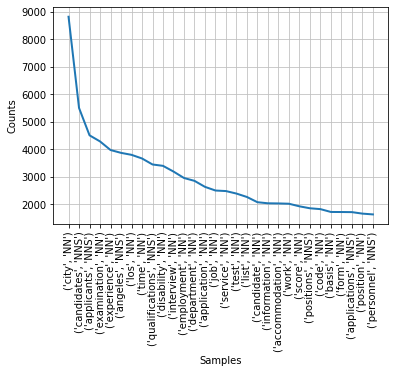

In [161]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist_pos.plot(30,cumulative=False)
plt.show()

In [162]:
# Convert the List Into a DataFrame to Clean
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) 
top_words_df = top_words_df.drop('pos', 1)
top_words_df.head()

,count,Word
0,8817,city
1,5503,candidates
2,4510,applicants
3,4288,examination
4,3976,experience


In [163]:
top_words_df

,count,Word
0,8817,city
1,5503,candidates
2,4510,applicants
3,4288,examination
4,3976,experience
5,3873,angeles
6,3801,los
7,3669,time
8,3451,qualifications
9,3401,disability


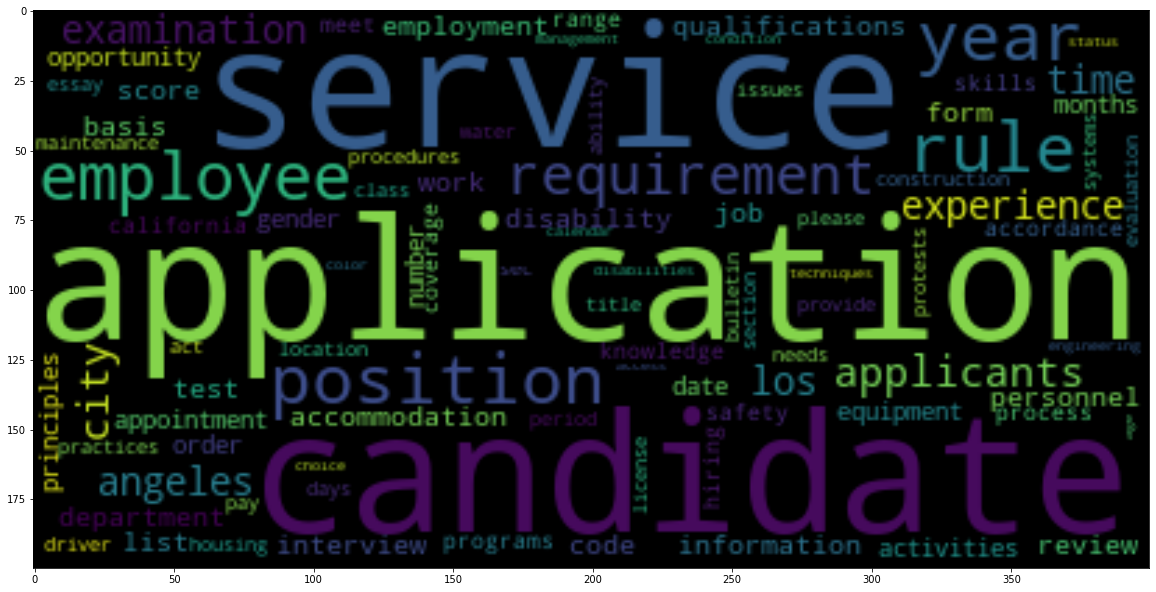

In [165]:
# Use Wordcloud and Matplotlib Libraries to present In Form of a Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

subset_pos = top_words_df[['Word', 'count']]
tuples_pos = [x[0] for x in subset_pos.values]
text = " ".join(tuples_pos)
wordcloud = WordCloud()
wordcloud.generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [67]:
# Most Frequent Phrases - Most Frequent Bigrams (2 words) and Trigrams (3 words)
bgs = nltk.bigrams(contents_tokens)
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens
bgs_100 = fdist2.most_common(100) # top-100 bigrams
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))
bgs_df.head()

,bigram,count
0,"(., .)",150354
1,"(of, the)",8791
2,"(,, and)",7204
3,"(will, be)",5961
4,"(in, the)",5538


In [23]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+ x[1]) # merging the tuple into a string
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation
bgs_df.head()

,bigram,count,phrase,filter_bgs
0,"(., .)",150354,. .,True
1,"(of, the)",8791,of the,False
2,"(,, and)",7204,", and",True
3,"(will, be)",5961,will be,False
4,"(in, the)",5538,in the,True


In [24]:
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation

bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns

bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

,count,phrase
1,8791,of the
3,5961,will be
6,3921,the city
7,3660,to the
9,3423,of los
10,3391,city of
11,3126,may be
14,2479,of a
21,2165,to be
23,2131,with the


In [25]:
# Remove Stop Words
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
contents_tokens_list1 = [ ]
for token in contents_tokens:
    if token not in stop:
        contents_tokens_list1.append(token)
contents_tokens_list1

['[',
 "'senior",
 'housing',
 'inspector\\n\\nclass',
 'code',
 ':',
 '4244\\nopen',
 'date',
 ':',
 '04-27-18\\n',
 '(',
 'exam',
 'open',
 'current',
 'city',
 'employees',
 ')',
 '\\n\\nannual',
 'salary',
 '\\n\\n',
 '$',
 '90,410',
 '$',
 '109,306\\n\\nnote',
 ':',
 '\\n\\n1',
 '.',
 'annual',
 'salary',
 'start',
 'pay',
 'range',
 '.',
 'current',
 'salary',
 'range',
 'subject',
 'change',
 '.',
 'please',
 'confirm',
 'starting',
 'salary',
 'hiring',
 'department',
 'accepting',
 'job',
 'offer.\\n2',
 '.',
 'candidates',
 'eligible',
 'list',
 'normally',
 'appointed',
 'vacancies',
 'lower',
 'pay',
 'grade',
 'positions.\\n\\nduties\\n\\na',
 'senior',
 'housing',
 'inspector',
 'supervises',
 'employees',
 'engaged',
 'either',
 'inspection',
 'residential',
 'rental',
 'property',
 'locations',
 'conformance',
 'housing',
 'habitability',
 ',',
 'quality',
 ',',
 'property',
 'maintenance',
 'ordinances',
 ';',
 'investigation',
 'code',
 'violation',
 'complaints',
 'f

In [26]:
# Most Frequent Phrases - Most Frequent Bigrams (2 words) and Trigrams (3 words)
tgs = nltk.trigrams(contents_tokens)
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens
tgs_100 = fdist3.most_common(100) # top-100 trigrams
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))
tgs_df.head()

,trigram,count
0,"(., ., .)",148288
1,"(city, of, los)",3390
2,"(of, los, angeles)",3355
3,"(the, city, of)",2374
4,"(will, not, be)",1817


In [68]:
tgs_df['phrase'] = tgs_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2]) # merging the tuple into a string
tgs_df['filter_tgs'] = tgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation
tgs_df.head()

,trigram,count,phrase,filter_tgs
0,"(., ., .)",148288,. . .,True
1,"(city, of, los)",3390,city of los,False
2,"(of, los, angeles)",3355,of los angeles,True
3,"(the, city, of)",2374,the city of,False
4,"(will, not, be)",1817,will not be,True


In [69]:
tgs_df = tgs_df[tgs_df.filter_tgs == False] # removing strings with numbers and punctuation
tgs_df = tgs_df.drop('trigram', 1)
tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns
tgs_df.reset_index()
tgs_df.head(20) 

,count,phrase
1,3390,city of los
3,2374,the city of
6,1391,the basis of
19,1042,of the city
24,949,a reserve list
28,914,with civil service
36,830,civil service rule
37,828,who meet the
39,817,the time of
43,805,may be disqualified


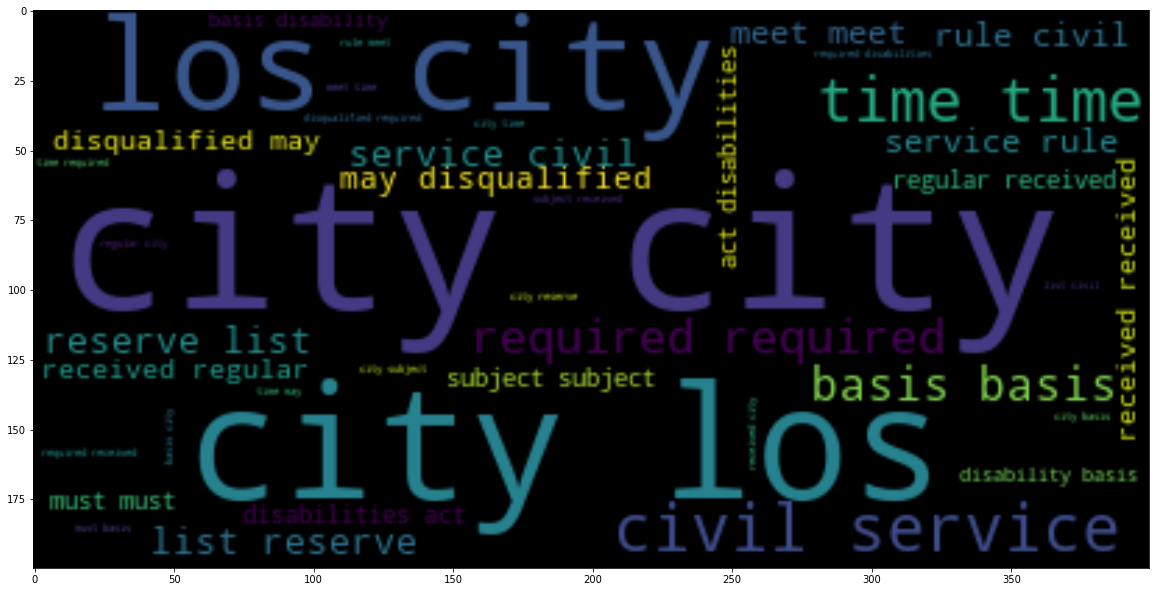

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

subset_pos = tgs_df[['phrase', 'count']]
tuples_pos = [(x[0] + " ") * x[1] for x in subset_pos.values]
text = " ".join(tuples_pos)
wordcloud = WordCloud()
wordcloud.generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
# Install Word Cloud
!pip install wordcloud

In [55]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# https://www.datacamp.com/community/tutorials/wordcloud-python

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(all_contents)

TypeError: expected string or bytes-like object

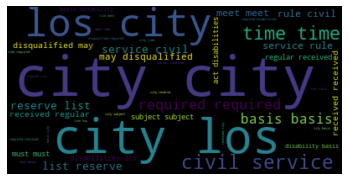

In [74]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# nltk.download('stopwords')

# # https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3

# from nltk.corpus import stopwords

# sr = stopwords.words('english')
# clean_tokens = contents_tokens[:]
# for token in contents_tokens:
#     if token in stopwords.words('english'):
        
#         clean_tokens.remove(token)
# freq = nltk.FreqDist(clean_tokens)
# for key,val in freq.items():
#     print(str(key) + ':' + str(val))
# freq.plot(20, cumulative=False)

In [ ]:
# https://levelup.gitconnected.com/machine-learning-with-python-nlp-and-text-recognition-94444d55b0ef

In [ ]:
# TF-IDF (term frequency-inverse document frequency)
# https://monkeylearn.com/blog/what-is-tf-idf/

In [ ]:
# Distinct Word Frequency Function
from nltk.probability import FreqDist
fdist = FreqDist()

In [ ]:
for word in contents_tokens:
    fdist[word.lower()]+=1
fdist

In [ ]:
# 25 Highest Frequency Words
fdist_top25 = fdist.most_common(25)
fdist_top25

In [ ]:
# NLTK Downloader to Obtain the `averaged_perceptron_tagger` Resource
nltk.download('averaged_perceptron_tagger')

In [ ]:
# POS: Parts of Speech

In [ ]:
nltk.pos_tag(contents_tokens)

In [ ]:
# NLTK Downloader to Obtain the `maxent_ne_chunker` Resource
nltk.download('maxent_ne_chunker')

In [ ]:
# NER: Named Entity Recognition
from nltk import ne_chunk

nltk.chunk.ne_chunk(top_words_df)

In [ ]:
# NLTK Downloader to Obtain the `words` Resource
nltk.download('words')

In [ ]:
# Display a Parse Tree

In [ ]:
nltk.download('treebank')

In [ ]:
# from nltk.corpus import treebank
# t = treebank.parsed_sents('wsj_0001.mrg')[0]
# t.draw()

In [ ]:
# Syntax Tree

### Readibility Index

In [ ]:
# Open All Files in Directory
all_files = os.listdir("data/Job Bulletins")
all_contents = []

for files in all_files:
    if files.endswith(".txt"):
        f = open("data/Job Bulletins/" + str(files), "r")
        all_contents.append(f.read())

In [44]:
import spacy
from spacy_readability import Readability

nlp = spacy.load('en')
read = Readability(nlp)
nlp.add_pipe(read, last=True)
doc = nlp("data/Job Bulletins/ZOO CURATOR OF EDUCATION 4300 091418.txt")
doc._.flesch_kincaid_grade_level
doc._.flesch_kincaid_reading_ease
doc._.dale_chall

TypeError: __init__() takes 1 positional argument but 2 were given

In [40]:
import spacy
from spacy_readability import Readability

nlp = spacy.load('en')
read = Readability(nlp)
nlp.add_pipe(read, last = True)
doc = nlp(contents_tokens)
doc._.flesch_kincaid_grade_level
doc._.flesch_kincaid_reading_ease
doc._.dale_chall

TypeError: __init__() takes 1 positional argument but 2 were given

In [75]:
import spacy
from spacy_readability import Readability

nlp = spacy.load('en')
read = Readability(nlp)
nlp.add_pipe(read, last=True)

doc = nlp("data/Job Bulletins/ZOO CURATOR OF EDUCATION 4300 091418.txt")

print(doc._.flesch_kincaid_grade_level)
print(doc._.flesch_kincaid_reading_ease)
print(doc._.dale_chall)
print(doc._.smog)
print(doc._.coleman_liau_index)
print(doc._.automated_readability_index)
print(doc._.forcast)

TypeError: __init__() takes 1 positional argument but 2 were given

In [78]:
from readibility import Readability

text = "I am some really difficult text to read because I use obnoxiously large words."
r = Readability(text)
fk = r.flesch_kincaid()

print(fk.score)
print(fk.grade_level)

ModuleNotFoundError: No module named 'readibility'

In [80]:
!pip install textstat

     |████████████████████████████████| 3.0MB 5.6MB/s eta 0:00:01


In [188]:
# # Calculate Statistics from Text to Determine Readability, Complexity and Grade Level of a Particular Corpus
# import textstat

# # Open All Files in Directory
# all_contents = []

# for files in all_files:
#     if files.endswith(".txt"):
#         flo = open("data/Job Bulletins/" + str(files), "r")
#         test_data = flo.read()
#         a = textstat.flesch_reading_ease(test_data)
#         b = textstat.smog_index(test_data)
#         c = textstat.flesch_kincaid_grade(test_data)
#         d = textstat.coleman_liau_index(test_data)
#         e = textstat.automated_readability_index(test_data)
#         f = textstat.dale_chall_readability_score(test_data)
#         g = textstat.difficult_words(test_data)
#         h = textstat.linsear_write_formula(test_data)
#         i = textstat.gunning_fog(test_data)
#         j = textstat.text_standard(test_data)
#         k = textstat.syllable_count(test_data, lang='en_US')
#         l = textstat.lexicon_count(test_data, removepunct=True)
#         m = textstat.gunning_fog(test_data)
#         n = textstat.text_standard(test_data, float_output=False)
#         all_contents.append({str(files): f})
#         print(f"Dale Chall Readability Score: {f}(Grade Level)")


# print(all_contents)

In [ ]:
test_data = ("data/Job Bulletins/ACCOUNTANT 1513 062218.txt")

a = textstat.flesch_reading_ease(test_data)
'''Score	Difficulty
90-100	Very Easy
80-89	Easy
70-79	Fairly Easy
60-69	Standard
50-59	Fairly Difficult
30-49	Difficult
0-29	Very Confusing
'''

b = textstat.smog_index(test_data)
c = textstat.flesch_kincaid_grade(test_data)
d = textstat.coleman_liau_index(test_data)
e = textstat.automated_readability_index(test_data)

f = textstat.dale_chall_readability_score(test_data)
'''Score	Understood by
4.9 or lower	average 4th-grade student or lower
5.0–5.9	average 5th or 6th-grade student
6.0–6.9	average 7th or 8th-grade student
7.0–7.9	average 9th or 10th-grade student
8.0–8.9	average 11th or 12th-grade student
9.0–9.9	average 13th to 15th-grade (college) student
'''

g = textstat.difficult_words(test_data)
h = textstat.linsear_write_formula(test_data)
i = textstat.gunning_fog(test_data)
j = textstat.text_standard(test_data)
k = textstat.syllable_count(text, lang='en_US')
l = textstat.lexicon_count(text, removepunct=True)
m = textstat.gunning_fog(text)
n = textstat.text_standard(text, float_output=False)

In [168]:
print(f"Dale Chall Readability Score: {f}(Grade Level)")

Dale Chall Readability Score: 15.68(Grade Level)


In [169]:
print(f"Flesch Reading Ease: {a}(Difficulty Rating)")

Flesch Reading Ease: 33.58(Difficulty Rating)


In [117]:
print(b)

0.0


In [118]:
print(c)

9.6


In [119]:
print(d)

33.35


In [120]:
print(e)

30.0


In [121]:
print(f)

15.68


In [99]:
print(g)

3


In [100]:
print(h)

2.0


In [101]:
print(i)

11.6


In [102]:
print(j)

11th and 12th grade


In [103]:
print(k)

84677


In [104]:
print(l)

66309


In [105]:
print(m)

26523.6


In [106]:
print(n) all_contents

-1th and 0th grade


In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=top_words_df)
X_tfidf = tfidf_vect.fit_transform(data["data/Job Bulletins/ACCOUNTANT 1513 062218.txt"])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

NameError: name 'data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data["data/Job Bulletins/ACCOUNTANT 1513 062218.txt"])
print(X_counts.shape)
print(count_vect.get_feature_names())

In [189]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re

In [193]:
# https://iyzico.engineering/how-to-calculate-tf-idf-term-frequency-inverse-document-frequency-from-the-beatles-biography-in-c4c3cd968296

sentences = list()
with open("data/Job Bulletins/ACCOUNTANT 1513 062218.txt") as file:
    for line in file:
        for l in re.split(r"\.\s|\?\s|\!\s|\n",line):
            if l:
                sentences.append(l)

In [194]:
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.5, ngram_range=(1,2))
sf = cvec.fit_transform(sentences)

In [195]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

In [196]:
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
33,examination,0.045538
79,test,0.043350
16,candidates,0.036922
68,qualifying,0.036848
7,applicants,0.036095
11,apply,0.035789
18,city,0.034806
74,salary,0.032994
41,interview,0.032764
2,accounting,0.032558


In [ ]:
# Open All Files in Directory
all_contents = []

for files in all_files:
    if files.endswith(".txt"):
        flo = open("data/Job Bulletins/" + str(files), "r")
        test_data = flo.read()